# Reddit Data Extraction

## Import Libraries

In [21]:
import sys
import pandas as pd
import json
import datetime
import re #regex
import requests #APIs
import praw #reddit API enhanced library
import ffn #stock data
from textblob import TextBlob
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tensorflow as tf
from tensorflow import keras #lstm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import numpy as np
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
import pickle

## Read Data

Read data from previous section

In [2]:
df_wsb = pd.read_csv('daily_disc_raw_wsb.csv')

In [3]:
df_stocks = pd.read_csv('daily_disc_raw_stocks.csv')

In [4]:
with open('listfile_stocks.data', 'rb') as filehandle:
    # read the data as binary data stream
    comments_by_day_stocks = pickle.load(filehandle)

In [5]:
with open('listfile_wsb.data', 'rb') as filehandle:
    # read the data as binary data stream
    comments_by_day_wsb = pickle.load(filehandle)

In [6]:
df_wsb_kw = pd.read_csv('keywords_raw_wsb.csv')

In [7]:
df_stocks_kw = pd.read_csv('keywords_raw_stocks.csv')

In [24]:
comments_by_day_stocks

[['Well that was u/bigbear0083 post.\n\nI was thinking of dropping a daily discussion thread every morning at like 8am, auto scheduled.\n\nThe mods discussed it awhile ago, we went with a quarterly thread.  But if users here want a serious stock focused daily discussion instead of the ones they get on other subs, then yeah let me know.\n\nEDIT OK [first one here.](https://www.reddit.com/r/stocks/comments/8qio6f/daily_discussion_rstocks_tuesday_jun_12_2018/)',
  "Maybe not exactly what you're looking for, but wallstreetbets does a daily discussion thread that has a good amount of content, and if you don't mind some jokes here and there it is a good way to gauge market sentiments on a day-to-day basis. I think this sub is too long-term focused for a daily thread to have quality content every day of the week.",
  "oh man! i'm very late to see this thread...didn't even know about it if not for the mentions by /u/lykosen11! thank you sir! :D \n\nthx so much for the kudos and shout outs in h

## Sentiment Analysis

VADER (Valence Aware Dictionary for sEntiment Reasoning) 

In [9]:
## define VADER analyzer

analyser = SentimentIntensityAnalyzer()

In [10]:
## run vader sentiment analyzer for stocks

scores=[]
for comments in comments_by_day_stocks:
    sentiment_score=0
    try:
        for comment in comments:
            sentiment_score=sentiment_score+analyser.polarity_scores(comment)['compound']
    except TypeError:
        sentiment_score=0
    
    scores.append(sentiment_score)
    


In [11]:
df_stocks['sentiment score']=scores

In [12]:
df_stocks

Unnamed: 0      id                                              title  \
0             0  8q9egq  What happened to the daily stock discussion th...   
1             1  8qio6f  Daily discussion - r/Stocks Tuesday - Jun 12, ...   
2             2  8qrkat  Daily discussion - r/Stocks Wednesday - Jun 13...   
3             3  8r0yzs  Daily discussion - r/Stocks Thursday - Jun 14,...   
4             4  8ra3vn  Daily discussion - r/Stocks Friday - Jun 15, 2018   
..          ...     ...                                                ...   
714         716  mkgpbr    r/Stocks Daily Discussion Monday - Apr 05, 2021   
715         717  ml7rbq  r/Stocks Daily Discussion &amp; Technicals Tue...   
716         718  mlycbf  r/Stocks Daily Discussion Wednesday - Apr 07, ...   
717         719  mmo2go  r/Stocks Daily Discussion &amp; Options Tradin...   
718         720  mnditp  r/Stocks Daily Discussion &amp; Fundamentals F...   

                                                   url        date  flair  \
0    https://www.reddit.com/r/stocks/comments/8q9eg...  2018-06-11    NaN   
1    https://www.reddit.com/r/stocks/comments/8qio6...  2018-06-12    NaN   
2    https://www.reddit.com/r/stocks/comments/8qrka...  2018-06-13    NaN   
3    https://www.reddit.com/r/stocks/comments/8r0yz...  2018-06-14    NaN   
4    https://www.reddit.com/r/stocks/comments/8ra3v...  2018-06-15    NaN   
..                                                 ...         ...    ...   
714  https://www.reddit.com/r/stocks/comments/mkgpb...  2021-04-05    NaN   
715  https://www.reddit.com/r/stocks/comments/ml7rb...  2021-04-06    NaN   
716  https://www.reddit.com/r/stocks/comments/mlycb...  2021-04-07    NaN   
717  https://www.reddit.com/r/stocks/comments/mmo2g...  2021-04-08    NaN   
718  https://www.reddit.com/r/stocks/comments/mndit...  2021-04-09    NaN   

     sentiment score  
0             2.4699  
1             1.2858  
2             0.3503  
3             0.1511  
4             0.7227  
..               ...  
714          35.8456  
715          25.8704  
716          30.9270  
717          41.9974  
718          34.2518  

[719 rows x 7 columns]

In [53]:
df_stocks.to_csv('pos_neg_sent_stocks.csv')

In [13]:
## run vader sentiment analyzer for wsb

scores=[]
for comments in comments_by_day_wsb:
    sentiment_score=0
    try:
        for comment in comments:
            sentiment_score=sentiment_score+analyser.polarity_scores(comment)['compound']
    except TypeError:
        sentiment_score=0
    
    scores.append(sentiment_score)


In [14]:
df_wsb['sentiment score']=scores

In [15]:
df_wsb.to_csv('pos_neg_sent_wsb.csv')

In [16]:
df_wsb.head()

Unnamed: 0      id                                        title  \
0           0  7iwcux  Daily Discussion Thread - December 10, 2017   
1           1  7j4u75  Daily Discussion Thread - December 11, 2017   
2           2  7jjwwy              Daily discussion - Dec 13, 2017   
3           3  7jr634  Daily Discussion Thread - December 14, 2017   
4           4  7kktzz  Daily Discussion Thread - December 18, 2017   

                                                 url        date flair  \
0  https://www.reddit.com/r/wallstreetbets/commen...  2017-12-10   NaN   
1  https://www.reddit.com/r/wallstreetbets/commen...  2017-12-11   NaN   
2  https://www.reddit.com/r/wallstreetbets/commen...  2017-12-13   NaN   
3  https://www.reddit.com/r/wallstreetbets/commen...  2017-12-14   NaN   
4  https://www.reddit.com/r/wallstreetbets/commen...  2017-12-18   NaN   

   sentiment score  
0          -0.0063  
1          -0.6738  
2           2.1726  
3          -0.5143  
4           1.9078

In [17]:
df_wsb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       859 non-null    int64  
 1   id               859 non-null    object 
 2   title            859 non-null    object 
 3   url              859 non-null    object 
 4   date             859 non-null    object 
 5   flair            499 non-null    object 
 6   sentiment score  859 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 47.1+ KB


## Sentiment Analysis - Keywords

Apply scoring based on presence of positive(buy)/negative(sell) keywords in Reddit post titles

### WSB Bear/Bull Scores

In [ ]:
# create bull and bear sentiment scores for each day using keywords (WSB)
df_wsb_kw.title=df_wsb_kw.title.astype(str)
titles=df_wsb_kw['title'].tolist()
titles=list([(title.lower()) for title in titles])

In [ ]:
bull_words=['call', 'long', 'all in', 'moon', 'going up', 'rocket', 'buy', 'long term', 'green']
bear_words=['put', 'short', 'going down', 'drop', 'bear', 'sell', 'red']

bull_scores=[]
bear_scores=[]

In [ ]:
# Apply scores for times keywords appear in titles
for title in titles:
    bull=False
    bear=False
    for word in bull_words:
        if word in title:
            bull=True
    if re.findall(r'(\b\d{1,4}[c]\b)|(\b\d{1,4}[ ][c]\b)', title):
            bull=True
    for word in bear_words:
        if word in title:
            bear=True
    if re.findall(r'(\b\d{1,4}[p]\b)|(\b\d{1,4}[ ][p]\b)', title):
            bear=True 
    if bull==True and bear==True:
        bull_scores.append(0)
        bear_scores.append(0)
    if bull==False and bear==False:
        bull_scores.append(0)
        bear_scores.append(0)
    if bull==True and bear==False:
        bull_scores.append(1)
        bear_scores.append(0)
    if bull==False and bear==True:
        bull_scores.append(0)
        bear_scores.append(1)

In [ ]:
df_wsb_kw['bull score']=bull_scores
df_wsb_kw['bear score']=bear_scores

In [ ]:
df_wsb_kw.tail()

In [ ]:
df_wsb_kw.info()

In [ ]:
df_wsb_kw.describe()

In [ ]:
# remove irrelevant flairs

indeces=[]
flairs=df_wsb_kw['flair'].tolist()

In [ ]:
print(*Counter(flairs))

#Source: https://www.geeksforgeeks.org/python-get-unique-values-list/

In [ ]:
for n in range(len(flairs)):
    if flairs[n]=='DD' or flairs[n]=='Discussion' or flairs[n]=='YOLO' or flairs[n]=='Fundamentals' or flairs[n]=='Stocks' or flairs[n]=='News' or flairs[n]=='Gain' or flairs[n]=='Technical Analysis' or flairs[n]=='Weekend Discussion':
        indeces.append(n)

In [ ]:
df_wsb_kw=df_wsb_kw.iloc[indeces]

In [ ]:
df_wsb_kw.info()

In [ ]:
# standardize scores using total scores for day

scores_df_wsb=df_wsb_kw.groupby('date').sum()

In [ ]:
scores_df_wsb['bull score']=scores_df_wsb['bull score']/df_wsb_kw.groupby('date').count()['bull score']
scores_df_wsb['bear score']=scores_df_wsb['bear score']/df_wsb_kw.groupby('date').count()['bear score']

In [ ]:
scores_df_wsb

In [ ]:
scores_df_wsb.reset_index(drop=False, inplace=True)

#Source: https://stackoverflow.com/questions/58435657/how-to-access-column-after-pandas-groupby

In [ ]:
scores_df_wsb.info()

In [ ]:
scores_df_wsb.to_csv('bull_bear_scores_wsb.csv')

### Stocks Bear/Bull Scores

In [ ]:
# create bull and bear sentiment scores for each day using keywords (Stocks)

titles=df_stocks_kw['title'].tolist()
titles=list([(title.lower()) for title in titles])

In [ ]:
bull_words=['call', 'long', 'all in', 'moon', 'going up', 'rocket', 'buy', 'long term', 'green']
bear_words=['put', 'short', 'going down', 'drop', 'bear', 'sell', 'red']

bull_scores=[]
bear_scores=[]

In [ ]:
# Apply scores for times keywords appear in titles

for title in titles:
    bull=False
    bear=False
    for word in bull_words:
        if word in title:
            bull=True
    if re.findall(r'(\b\d{1,4}[c]\b)|(\b\d{1,4}[ ][c]\b)', title):
            bull=True
    for word in bear_words:
        if word in title:
            bear=True
    if re.findall(r'(\b\d{1,4}[p]\b)|(\b\d{1,4}[ ][p]\b)', title):
            bear=True
    if bull==True and bear==True:
        bull_scores.append(0)
        bear_scores.append(0)
    if bull==False and bear==False:
        bull_scores.append(0)
        bear_scores.append(0)
    if bull==True and bear==False:
        bull_scores.append(1)
        bear_scores.append(0)
    if bull==False and bear==True:
        bull_scores.append(0)
        bear_scores.append(1)

In [ ]:
df_stocks_kw['bull score']=bull_scores
df_stocks_kw['bear score']=bear_scores

In [ ]:
# remove irrelevant flairs

indeces=[]
flairs=df_stocks_kw['flair'].tolist()

In [ ]:
print(*Counter(flairs))

#Source: https://www.geeksforgeeks.org/python-get-unique-values-list/

In [ ]:
for n in range(len(flairs)):
    if flairs[n]=='DD' or flairs[n]=='Discussion' or flairs[n]=='Ticke' or flairs[n]=='Analysis' or flairs[n]=='Request' or flairs[n]=='News' or flairs[n]=='Industry News' or flairs[n]=='Company Question' or flairs[n]=='Trades':
        indeces.append(n)

In [ ]:
df_stocks_kw=df_stocks_kw.iloc[indeces]

In [ ]:
## standardize scores using total scores for day

scores_df_stocks=df_stocks_kw.groupby('date').sum()

In [ ]:
scores_df_stocks['bull score']=scores_df_stocks['bull score']/df_stocks_kw.groupby('date').count()['bull score']
scores_df_stocks['bear score']=scores_df_stocks['bear score']/df_stocks_kw.groupby('date').count()['bear score']

In [ ]:
scores_df_stocks

In [ ]:
scores_df_stocks.reset_index(drop=False, inplace=True)

#Source: https://stackoverflow.com/questions/58435657/how-to-access-column-after-pandas-groupby

In [ ]:
scores_df_stocks.info()

In [ ]:
scores_df_stocks.to_csv('bull_bear_scores_stocks.csv')

## Wordcloud - Stock Comments

In [129]:
# Get stopwords from wordcloud library
stopwords = set(STOPWORDS)

# Add words that are specific to reddit and don't contribute overall
stop_words=['https','reddit','stocks','stock','comment','comments','share','question','today']

stopwords.update(stop_words)

In [130]:
comments_stocks_df = pd.DataFrame(comments_by_day_stocks)

In [131]:
comments_stocks_df

0    \
0    Well that was u/bigbear0083 post.\n\nI was thi...   
1    I'm making this a sticky just for today to get...   
2    Has anyone sold ABBV on a loss? Bought in at 1...   
3    Why does nobody use this?!\n\n\nAlso, I always...   
4    I'm really tech heavy right now and I'm thinki...   
..                                                 ...   
714  Morning all,\n\nJust would like to confirm the...   
715  Seeing how much some of yall are down, what th...   
716  Hi All,\n\nWe're going to be keeping the sub a...   
717  Does anyone else keep a watchlist of all the s...   
718  Anyone else feel like early on in their time a...   

                                                   1    \
0    Maybe not exactly what you're looking for, but...   
1    Does anyone have thoughts on what the fed rais...   
2    Can someone help me answery question? When and...   
3                      Look at GOOGL, AMZN, TSLA, NFLX   
4    Just jumped on the HUYA, IQ, and SOGO train. \...   
..                                                 ...   
714  Seems like the market is telling us Apple, Ama...   
715  Corsair you want to hold that fucking gain ple...   
716                      Palantir disappoints everyday   
717  Started investing right at the all time highs ...   
718  Apple literally doesn't care about the rest of...   

                                                   2    \
0    oh man! i'm very late to see this thread...did...   
1    So relieved at JD. Tempted to sell when/if I b...   
2    Fed seems to be accelerating interest rate inc...   
3                                                 None   
4    can someone explain exactly what owning 100 sh...   
..                                                 ...   
714            Facebook is like "lol, what data leak?"   
715  Guys, i just went positive overall. Started in...   
716  mr powell can you please stop speaking every o...   
717  **Daily Stock Market Forecast**\n\n**Bull Case...   
718  Imagine not buying the biggest tech company wh...   

                                                   3    \
0    With complaints/fear making up 99% of comments...   
1    TWTR & TSLA got upgrades (JPM and KeyBanc resp...   
2    Who's ready for FED hike at 2pm and their conf...   
3                                                 None   
4    Damn, my 248 bid for Adobe didn't get a hit.\n...   
..                                                 ...   
714  Nothing worse than indexes being up 1%+ and yo...   
715  Dumping 20k in since ISA's in the UK have open...   
716                          Come on TSM, do something   
717  AAPL waking up right on time. This chart movem...   
718  Buying apple at the dips was the easiest money...   

                                                   4    \
0                                      r/thewallstreet   
1    Question on earnings. Why is the expected earn...   
2    People's thoughts on AMD? New to this, been re...   
3                                                 None   
4    With gme recent price spike I’ve almost broke ...   
..                                                 ...   
714  **Daily Stock Market Forecast**\n\nToday is ab...   
715                        Sorry I doubted you $ETSY 🥰   
716  Watching my green energy-heavy portfolio the l...   
717  It turns out.... 5% gains on $100 doesn't get ...   
718  AAPL is my biggest non-ETF holding and I bough...   

                                                   5    \
0                                       it crashed lol   
1    $SKY. \n\nThis stock has had quiet growth YTD ...   
2    Any thoughts on FNGU to hold for medium term? ...   
3                                                 None   
4    Do you think the dropping price of oil is a da...   
..                                                 ...   
714  It's nice to see that even when the markets go...   
715  NY Sports Betting bill will pass in upcoming b...   
716                                 i hate t

In [132]:
comments_stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Columns: 378 entries, 0 to 377
dtypes: object(378)
memory usage: 2.1+ MB


In [133]:
comments_stocks_df[1] = comments_stocks_df[1].astype(str)

In [134]:
# join all comments
text = " ".join(comment for comment in comments_stocks_df[1])

#comments_by_day_stocks

In [135]:
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, min_word_length=5).generate(text)

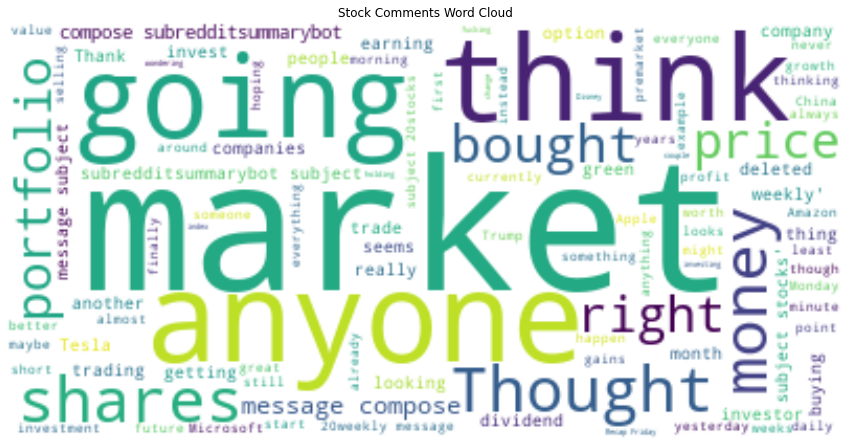

In [136]:
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Stock Comments Word Cloud')
plt.show()

#Source: https://quantdare.com/introduction-to-nlp-sentiment-analysis-and-wordclouds/

## Wordcloud - Stock Headers

In [138]:
df_stocks_kw['title'] = df_stocks_kw['title'].astype(str)

In [139]:
# join all comments
text = " ".join(comment for comment in df_stocks_kw['title'])

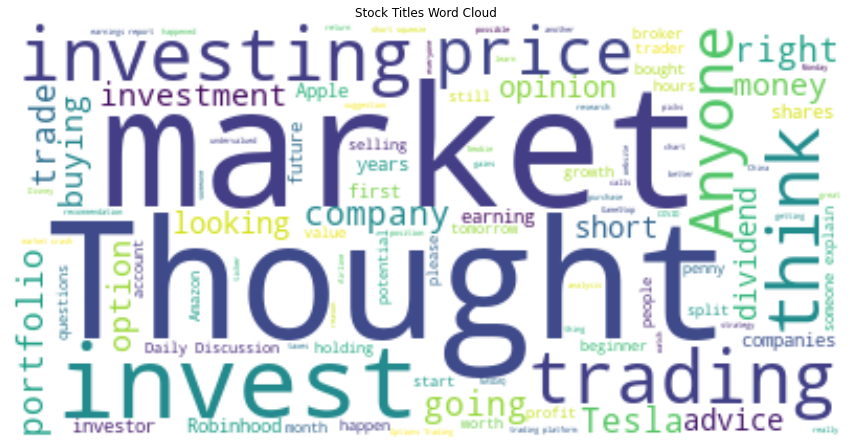

In [140]:
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, min_word_length=5).generate(text)

# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Stock Titles Word Cloud')
plt.show()

In [141]:
df_stocks_kw

Unnamed: 0      id                                              title  \
0                0  5iteyz  What trading methods are used by fully employe...   
1                1  5itie7  Mondelez International, Inc. (MDLZ), long term...   
2                2  5itk6u  What indicators can one look for to tell if th...   
3                3  5itmzs  Anyone doubling down on gold stocks at this po...   
4                4  5iu4to       New product out for ZNGA, worth more shares?   
...            ...     ...                                                ...   
333824      333824  mqjuqn  The Mania is real and it seems money is floodi...   
333825      333825  mqjxgz  Did Webull just pull listings for Coinbase? Cu...   
333826      333826  mqjztp                                       Coinbase IPO   
333827      333827  mqk3ab  Why is there still a full crypto ban on this s...   
333828      333828  mqkduw  How do they know earnings results before the q...   

                                                      url        date  \
0       https://www.reddit.com/r/stocks/comments/5itey...  2016-12-17   
1       https://www.reddit.com/r/stocks/comments/5itie...  2016-12-17   
2       https://www.reddit.com/r/stocks/comments/5itk6...  2016-12-17   
3       https://www.reddit.com/r/stocks/comments/5itmz...  2016-12-17   
4       https://www.reddit.com/r/stocks/comments/5iu4t...  2016-12-17   
...                                                   ...         ...   
333824  https://www.reddit.com/r/stocks/comments/mqjuq...  2021-04-13   
333825  https://www.reddit.com/r/stocks/comments/mqjxg...  2021-04-13   
333826  https://www.reddit.com/r/stocks/comments/mqjzt...  2021-04-13   
333827  https://www.reddit.com/r/stocks/comments/mqk3a...  2021-04-13   
333828  https://www.reddit.com/r/stocks/comments/mqkdu...  2021-04-13   

                      flair  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                       NaN   
...                     ...   
333824  Industry Discussion   
333825                  NaN   
333826       Advice Request   
333827                  NaN   
333828                  NaN   

                                                   scores  compound  
0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
2       {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...   -0.4019  
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
4       {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'comp...    0.5256  
...                                                   ...       ...  
333824  {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...    0.2244  
333825  {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...   -0.3230  
333826  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
333827  {'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'comp...   -0.6072  
333828  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  

[333829 rows x 8 columns]

## Compare All Polarrity Scores

In [142]:
# polarity_scores = []
    
df_stocks_kw['scores'] = df_stocks_kw['title'].apply(lambda title: analyser.polarity_scores(title))

df_stocks_kw.head()

#Source: https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

Unnamed: 0      id                                              title  \
0           0  5iteyz  What trading methods are used by fully employe...   
1           1  5itie7  Mondelez International, Inc. (MDLZ), long term...   
2           2  5itk6u  What indicators can one look for to tell if th...   
3           3  5itmzs  Anyone doubling down on gold stocks at this po...   
4           4  5iu4to       New product out for ZNGA, worth more shares?   

                                                 url        date flair  \
0  https://www.reddit.com/r/stocks/comments/5itey...  2016-12-17   NaN   
1  https://www.reddit.com/r/stocks/comments/5itie...  2016-12-17   NaN   
2  https://www.reddit.com/r/stocks/comments/5itk6...  2016-12-17   NaN   
3  https://www.reddit.com/r/stocks/comments/5itmz...  2016-12-17   NaN   
4  https://www.reddit.com/r/stocks/comments/5iu4t...  2016-12-17   NaN   

                                              scores  compound  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
2  {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...   -0.4019  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
4  {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'comp...    0.5256

In [143]:
df_stocks_kw['compound']  = df_stocks_kw['scores'].apply(lambda score_dict: score_dict['compound'])

df_stocks_kw.head()

Unnamed: 0      id                                              title  \
0           0  5iteyz  What trading methods are used by fully employe...   
1           1  5itie7  Mondelez International, Inc. (MDLZ), long term...   
2           2  5itk6u  What indicators can one look for to tell if th...   
3           3  5itmzs  Anyone doubling down on gold stocks at this po...   
4           4  5iu4to       New product out for ZNGA, worth more shares?   

                                                 url        date flair  \
0  https://www.reddit.com/r/stocks/comments/5itey...  2016-12-17   NaN   
1  https://www.reddit.com/r/stocks/comments/5itie...  2016-12-17   NaN   
2  https://www.reddit.com/r/stocks/comments/5itk6...  2016-12-17   NaN   
3  https://www.reddit.com/r/stocks/comments/5itmz...  2016-12-17   NaN   
4  https://www.reddit.com/r/stocks/comments/5iu4t...  2016-12-17   NaN   

                                              scores  compound  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
2  {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...   -0.4019  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
4  {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'comp...    0.5256

In [144]:
df_stocks_kw_pos = df_stocks_kw[df_stocks_kw['compound']>0]

In [145]:
df_stocks_kw_pos

Unnamed: 0      id                                              title  \
4                4  5iu4to       New product out for ZNGA, worth more shares?   
10              10  5iw41h  Who are the top stock analysts reporting on th...   
16              16  5ix2w2                                   Smart Sand (SND)   
17              17  5ixvbu  Looking for good dividend stocks that pay monthly   
18              18  5ixw58                Please give your day trading advice   
...            ...     ...                                                ...   
333805      333805  mnr5eo               Question about stocks and shares ISA   
333815      333815  mqje14  The mania is real and money is flooding in fro...   
333817      333817  mqjjpl  What do you all think about STMP? I think it's...   
333820      333820  mqjqzr  Paysafe issues Coinbase’s new Visa debit card ...   
333824      333824  mqjuqn  The Mania is real and it seems money is floodi...   

                                                      url        date  \
4       https://www.reddit.com/r/stocks/comments/5iu4t...  2016-12-17   
10      https://www.reddit.com/r/stocks/comments/5iw41...  2016-12-17   
16      https://www.reddit.com/r/stocks/comments/5ix2w...  2016-12-17   
17      https://www.reddit.com/r/stocks/comments/5ixvb...  2016-12-17   
18      https://www.reddit.com/r/stocks/comments/5ixw5...  2016-12-17   
...                                                   ...         ...   
333805  https://www.reddit.com/r/stocks/comments/mnr5e...  2021-04-09   
333815  https://www.reddit.com/r/stocks/comments/mqje1...  2021-04-13   
333817  https://www.reddit.com/r/stocks/comments/mqjjp...  2021-04-13   
333820  https://www.reddit.com/r/stocks/comments/mqjqz...  2021-04-13   
333824  https://www.reddit.com/r/stocks/comments/mqjuq...  2021-04-13   

                      flair  \
4                       NaN   
10                      NaN   
16                      NaN   
17                      NaN   
18                      NaN   
...                     ...   
333805       Advice Request   
333815  Industry Discussion   
333817   Company Discussion   
333820         Company News   
333824  Industry Discussion   

                                                   scores  compound  
4       {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'comp...    0.5256  
10      {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...    0.2023  
16      {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'comp...    0.4019  
17      {'neg': 0.136, 'neu': 0.583, 'pos': 0.282, 'co...    0.3612  
18      {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...    0.3182  
...                                                   ...       ...  
333805  {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...    0.2960  
333815  {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...    0.2244  
333817  {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp...    0.6486  
333820  {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...    0.4215  
333824  {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...    0.2244  

[88211 rows x 8 columns]

In [146]:
df_stocks_kw_neg = df_stocks_kw[df_stocks_kw['compound']<0]

In [155]:
df_stocks_kw

Unnamed: 0      id                                              title  \
0                0  5iteyz  What trading methods are used by fully employe...   
1                1  5itie7  Mondelez International, Inc. (MDLZ), long term...   
2                2  5itk6u  What indicators can one look for to tell if th...   
3                3  5itmzs  Anyone doubling down on gold stocks at this po...   
4                4  5iu4to       New product out for ZNGA, worth more shares?   
...            ...     ...                                                ...   
333824      333824  mqjuqn  The Mania is real and it seems money is floodi...   
333825      333825  mqjxgz  Did Webull just pull listings for Coinbase? Cu...   
333826      333826  mqjztp                                       Coinbase IPO   
333827      333827  mqk3ab  Why is there still a full crypto ban on this s...   
333828      333828  mqkduw  How do they know earnings results before the q...   

                                                      url        date  \
0       https://www.reddit.com/r/stocks/comments/5itey...  2016-12-17   
1       https://www.reddit.com/r/stocks/comments/5itie...  2016-12-17   
2       https://www.reddit.com/r/stocks/comments/5itk6...  2016-12-17   
3       https://www.reddit.com/r/stocks/comments/5itmz...  2016-12-17   
4       https://www.reddit.com/r/stocks/comments/5iu4t...  2016-12-17   
...                                                   ...         ...   
333824  https://www.reddit.com/r/stocks/comments/mqjuq...  2021-04-13   
333825  https://www.reddit.com/r/stocks/comments/mqjxg...  2021-04-13   
333826  https://www.reddit.com/r/stocks/comments/mqjzt...  2021-04-13   
333827  https://www.reddit.com/r/stocks/comments/mqk3a...  2021-04-13   
333828  https://www.reddit.com/r/stocks/comments/mqkdu...  2021-04-13   

                      flair  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                       NaN   
...                     ...   
333824  Industry Discussion   
333825                  NaN   
333826       Advice Request   
333827                  NaN   
333828                  NaN   

                                                   scores  compound  
0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
2       {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...   -0.4019  
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
4       {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'comp...    0.5256  
...                                                   ...       ...  
333824  {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...    0.2244  
333825  {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...   -0.3230  
333826  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
333827  {'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'comp...   -0.6072  
333828  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  

[333829 rows x 8 columns]

## Wordcloud - Stock Headers - Positive

In [148]:
df_stocks_kw_pos['title'] = df_stocks_kw_pos['title'].astype(str)

# join all comments
text = " ".join(comment for comment in df_stocks_kw_pos['title'])

<ipython-input-148-56062282c98e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stocks_kw_pos['title'] = df_stocks_kw_pos['title'].astype(str)


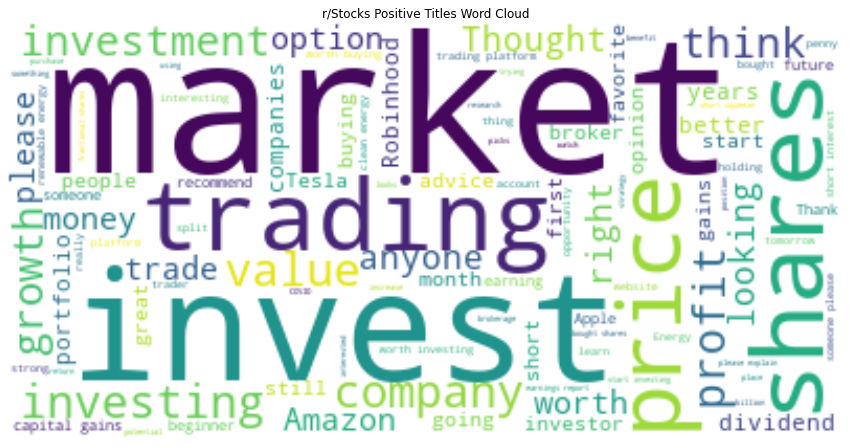

In [149]:
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, min_word_length=5).generate(text)

# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('r/Stocks Positive Titles Word Cloud')
plt.show()

## Wordcloud - Stock Headers - Negative


In [150]:
df_stocks_kw_neg['title'] = df_stocks_kw_neg['title'].astype(str)

# join all comments
text = " ".join(comment for comment in df_stocks_kw_neg['title'])

<ipython-input-150-ab7e32c79fac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stocks_kw_neg['title'] = df_stocks_kw_neg['title'].astype(str)


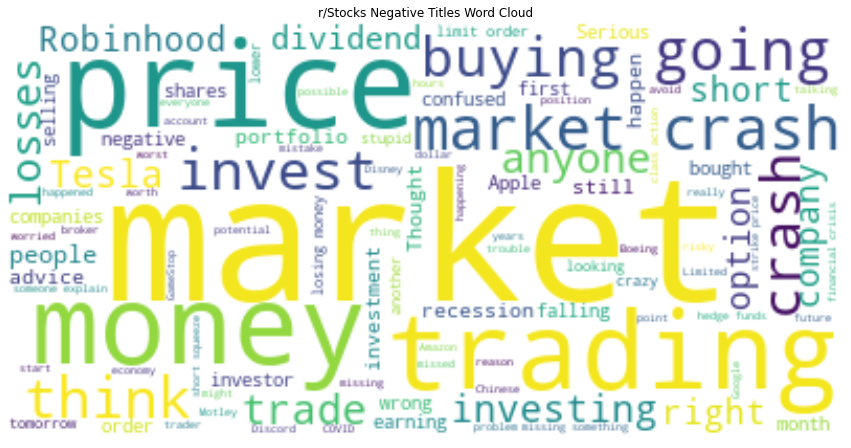

In [151]:
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, min_word_length=5).generate(text)

# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('r/Stocks Negative Titles Word Cloud')
plt.show()

## Future Steps:

### Most Important Words

https://realpython.com/python-nltk-sentiment-analysis/#selecting-useful-features

### Named Entity Recognition

Extract names from posts to classify them by stock ticker


https://towardsdatascience.com/ner-for-extracting-stock-mentions-on-reddit-aa604e577be

Sources: 

https://www.reddit.com/dev/api/

https://praw.readthedocs.io/en/latest/index.html

https://medium.com/analytics-vidhya/sentiment-analysis-for-trading-with-reddit-text-data-73729c931d01

https://towardsdatascience.com/ner-for-extracting-stock-mentions-on-reddit-aa604e577be

https://www.geeksforgeeks.org/python-get-unique-values-list/

https://towardsdatascience.com/ner-for-extracting-stock-mentions-on-reddit-aa604e577be

https://realpython.com/python-nltk-sentiment-analysis/#selecting-useful-features

https://stackoverflow.com/questions/58435657/how-to-access-column-after-pandas-groupby

https://quantdare.com/introduction-to-nlp-sentiment-analysis-and-wordclouds/

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664pol